In [35]:
# Import Libraries 
import cv2
import numpy as np
from plantcv import plantcv as pcv
import matplotlib.pyplot as plt

In [36]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [37]:
class options:
    def __init__(self):
        self.image = "/Users/garethtate/plantcv/TestImagesRPi/Still-1-RGB-2021-07-02_13-02-08.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "ROINDVI_test_results.json"
        self.outdir = "/Users/garethtate/plantcv" # Store the output to the current directory

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

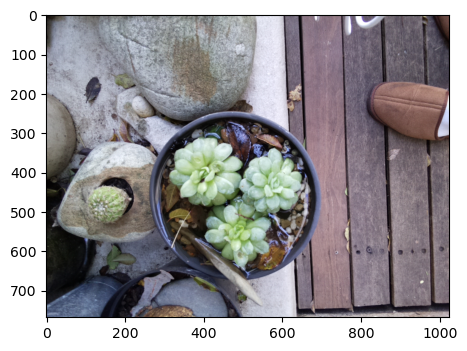

In [38]:
# Read image 

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
imgRGB, pathRGB, filenameRGB = pcv.readimage(filename=args.image)

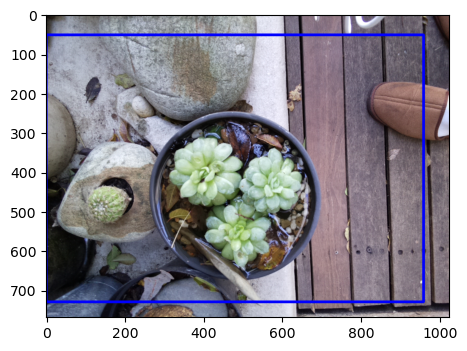

In [39]:
# Define region of interest (ROI)

# Inputs:
#    img   = An RGB or grayscale image to plot the ROI on.
#    x     = The x-coordinate of the upper left corner of the rectangle.
#    y     = The y-coordinate of the upper left corner of the rectangle.
#    h     = The width of the rectangle.
#    w     = The height of the rectangle.
#   roi_contour, roi_hierarchy = pcv.roi.rectangle(5, 90, 200, 390, img1) 
#                                                  |______________|
#                                            adjust these four values
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=imgRGB, x=0, y=50, h=680, w=960)

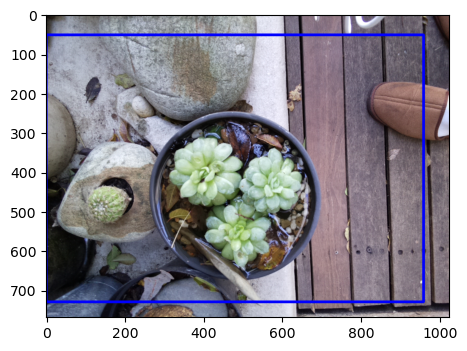

In [40]:
# Crop image
crop_imgRGB = pcv.crop(img=imgRGB, x=0, y=50, h=680, w=960)

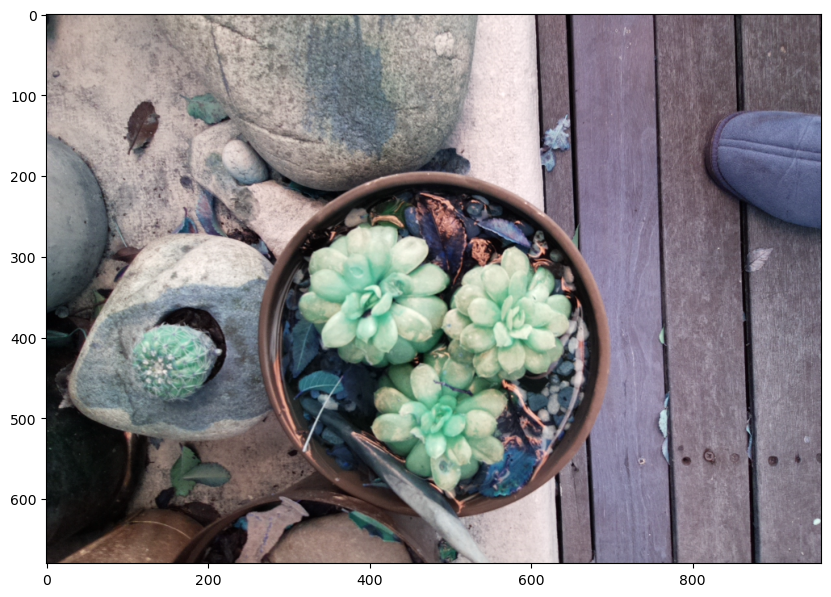

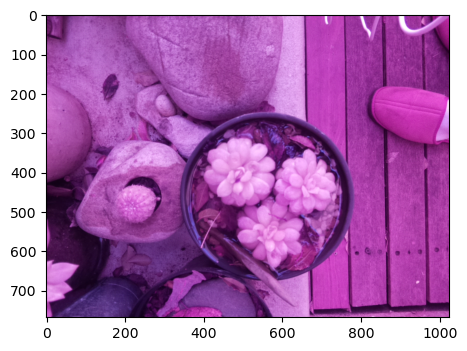

In [41]:
# Read image 

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
imgNIR, pathNIR, filenameNIR = pcv.readimage(filename="/Users/garethtate/plantcv/TestImagesRPi/Still-1-RGBN-2021-07-02_13-02-07.jpg")

In [42]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [43]:
hNIR, wNIR, chanNIR = imgNIR.shape

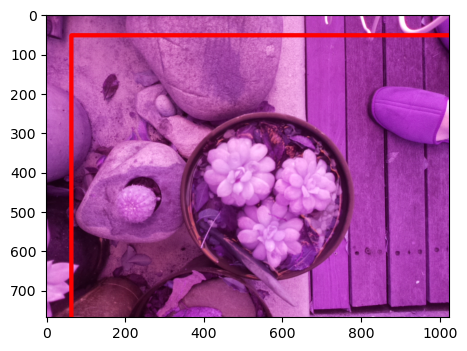

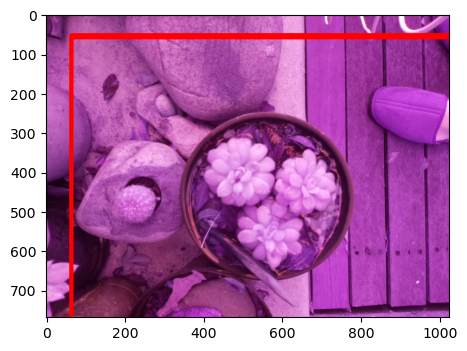

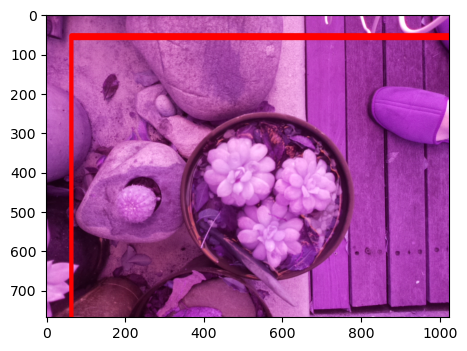

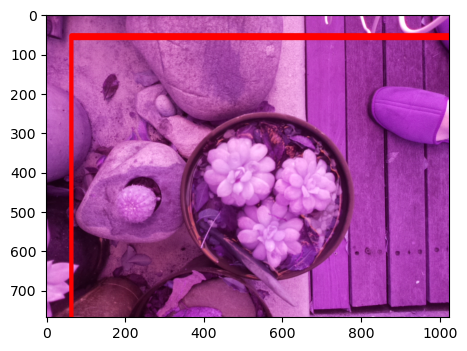

In [44]:
for m in methods:
    
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(imgNIR,crop_imgRGB,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle (assuming images have same w & h)
    bottom_right = (top_left[0] + wNIR, top_left[1] + hNIR)

    # Draw the Red Rectangle
    cv2.rectangle(imgNIR, top_left, bottom_right, 255, 10)

    # Plot the Images

    plt.imshow(imgNIR)
    
    
    plt.show()
    print('\n')
    print('\n')
    

In [45]:
top_left


(64, 58)

In [46]:
min_val, max_val, min_loc, max_loc

(0.2161528319120407, 0.314910888671875, (64, 58), (0, 0))

In [24]:
res


array([[0.2946064]], dtype=float32)